In [1]:
!pip install scikit-learn pandas numpy matplotlib pyyaml

In [4]:

# 🚀 How to Run This Notebook

#This notebook expects the project files to be stored in your own Google Drive.

#Follow these steps before running the code:

##---

## 1️⃣ Make sure the project folder is in your Drive

##Place the folder `cmpe_257_project`inside your: MyDrive

##So the path becomes:

##MyDrive/cmpe_257_project/


## 2️⃣ Mount Google Drive in Colab


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

project_path = '/content/drive/MyDrive/cmpe_257_project'

# Change current working directory to the project path
os.chdir(project_path)

print(f"Changed current working directory to: {os.getcwd()}")

Changed current working directory to: /content/drive/MyDrive/cmpe_257_project


In [3]:
# Install project requirements
!pip install -r requirements.txt

In [4]:
!ls configs
!ls src

baseline.yaml  poly_deg1.yaml  poly_deg2.yaml  poly_deg3.yaml  xgb_lstm.yaml
__init__.py  main.py  __pycache__  train.py  utils.py


In [5]:
%%writefile configs/poly_deg1.yaml
config_name: poly_deg1
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 1
      alpha: 1.0
metrics: [mse, mae, r2]
save_models: false


Overwriting configs/poly_deg1.yaml


In [6]:
%%writefile configs/poly_deg2.yaml
config_name: poly_deg2
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 1.0
metrics: [mse, mae, r2]
save_models: false


Overwriting configs/poly_deg2.yaml


In [7]:
%%writefile configs/poly_deg3.yaml
config_name: poly_deg3
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 3
      alpha: 1.0
metrics: [mse, mae, r2]
save_models: false


Overwriting configs/poly_deg3.yaml


In [8]:
#Run training for degree 1, 2, 3
import subprocess

configs = ["configs/poly_deg1.yaml", "configs/poly_deg2.yaml", "configs/poly_deg3.yaml"]

for cfg in configs:
    print(f"\n=== Running config: {cfg} ===\n")
    result = subprocess.run(
        ["python", "-m", "src.main", "--config", cfg],
        text=True,
        capture_output=True,
    )
    print(result.stdout)
    if result.stderr:
        print("STDERR:\n", result.stderr)



=== Running config: configs/poly_deg1.yaml ===


STDERR:
 INFO:root:Starting main...
INFO:root:Parsing arguments...
INFO:root:Config path: configs/poly_deg1.yaml
INFO:root:Results dir: results
INFO:__main__:Loading config...
INFO:root:Using poly_deg1 config...
INFO:root:Training all models...
INFO:root:Running cross validation for polynomial_regression...
INFO:root:polynomial_regression sumary:
                   model  window  mse_mean  ...   mae_std   r2_mean    r2_std
0  polynomial_regression       2  7.115913  ...  0.100317  0.999016  0.000533
1  polynomial_regression       3  7.126106  ...  0.100143  0.999015  0.000534
2  polynomial_regression       4  7.137225  ...  0.100167  0.999013  0.000534
3  polynomial_regression       5  7.148527  ...  0.100216  0.999011  0.000534

[4 rows x 8 columns]
INFO:root:Saving results for polynomial_regression
INFO:root:Done!


=== Running config: configs/poly_deg2.yaml ===


STDERR:
 INFO:root:Starting main...
INFO:root:Parsing arguments...
INFO

In [9]:
import os
from pathlib import Path
import pandas as pd

base_results_dir = Path("results")

# This function is now simplified as we know the structure
def get_latest_experiment_dir(model_base_path: Path, experiment_prefix: str) -> Path:
    candidates = [d for d in model_base_path.iterdir() if d.is_dir() and d.name.startswith(experiment_prefix)]
    if not candidates:
        raise RuntimeError(f"No results found for prefix {experiment_prefix} under {model_base_path}")
    return sorted(candidates)[-1]

deg_to_prefix = {
    1: "poly_deg1",
    2: "poly_deg2",
    3: "poly_deg3",
}

summary_by_degree = {}

# Diagnostic: Check the contents of the results directory first
print(f"Contents of {base_results_dir}:")
if base_results_dir.exists():
    for item in base_results_dir.iterdir():
        print(item.name)
else:
    print(f"Directory {base_results_dir} does not exist.")

for deg, experiment_prefix in deg_to_prefix.items():
    # All these polynomial models save under the 'polynomial_regression' directory
    model_base_path = base_results_dir / "polynomial_regression"

    # Find the latest experiment directory (e.g., poly_deg1_YYYYMMDD_HHMMSS)
    latest_experiment_dir = get_latest_experiment_dir(model_base_path, experiment_prefix)

    summary_path = latest_experiment_dir / "results_summary.csv"
    if not summary_path.exists():
        raise RuntimeError(f"Missing summary for degree {deg}: {summary_path}")
    df = pd.read_csv(summary_path)
    summary_by_degree[deg] = df
    print(f"Degree {deg}: loaded {summary_path}")
    display(df.head())

Contents of results:
.DS_Store
polynomial_regression
linear_regression
Degree 1: loaded results/polynomial_regression/poly_deg1_20251203_174116/results_summary.csv


,model,window,mse_mean,mse_std,mae_mean,mae_std,r2_mean,r2_std
0,polynomial_regression,2,7.115913,6.209531,0.802066,0.100317,0.999016,0.000533
1,polynomial_regression,3,7.126106,6.216789,0.803316,0.100143,0.999015,0.000534
2,polynomial_regression,4,7.137225,6.216809,0.804819,0.100167,0.999013,0.000534
3,polynomial_regression,5,7.148527,6.215278,0.805889,0.100216,0.999011,0.000534


Degree 2: loaded results/polynomial_regression/poly_deg2_20251203_174234/results_summary.csv


,model,window,mse_mean,mse_std,mae_mean,mae_std,r2_mean,r2_std
0,polynomial_regression,2,7.129210,6.210223,0.803407,0.100817,0.999014,0.000532
1,polynomial_regression,3,7.177107,6.236810,0.805799,0.101242,0.999007,0.000535
2,polynomial_regression,4,7.314450,6.428472,0.808586,0.101675,0.998991,0.000554
3,polynomial_regression,5,7.384315,6.482509,0.812272,0.101681,0.998980,0.000560


Degree 3: loaded results/polynomial_regression/poly_deg3_20251203_174729/results_summary.csv


,model,window,mse_mean,mse_std,mae_mean,mae_std,r2_mean,r2_std
0,polynomial_regression,2,8.670831,8.549769,0.814518,0.098398,0.998825,0.000764
1,polynomial_regression,3,11.996158,14.599505,0.830773,0.099051,0.998414,0.001395
2,polynomial_regression,4,31.623468,37.532647,0.857416,0.111129,0.996146,0.003874
3,polynomial_regression,5,62.930892,90.377575,0.897588,0.122548,0.992624,0.009373


In [10]:
%%writefile configs/poly_deg2_a01.yaml
config_name: poly_deg2_a01
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 0.1
metrics: [mse, mae, r2]
save_models: false


Writing configs/poly_deg2_a01.yaml


In [11]:
%%writefile configs/poly_deg2_a1.yaml
config_name: poly_deg2_a1
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 1.0
metrics: [mse, mae, r2]
save_models: false


Writing configs/poly_deg2_a1.yaml


In [12]:
%%writefile configs/poly_deg2_a10.yaml
config_name: poly_deg2_a10
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 10.0
metrics: [mse, mae, r2]
save_models: false


Writing configs/poly_deg2_a10.yaml


In [13]:
%%writefile configs/poly_deg2_a100.yaml
config_name: poly_deg2_a100
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 100.0
metrics: [mse, mae, r2]
save_models: false


Writing configs/poly_deg2_a100.yaml


In [14]:
#alpha tuning

import subprocess

configs = [
    "configs/poly_deg2_a01.yaml",
    "configs/poly_deg2_a1.yaml",
    "configs/poly_deg2_a10.yaml",
    "configs/poly_deg2_a100.yaml"
]

for cfg in configs:
    print(f"\n=== Running: {cfg} ===")
    out = subprocess.run(
        ["python", "-m", "src.main", "--config", cfg],
        text=True, capture_output=True
    )
    print(out.stdout)
    if out.stderr:
        print("ERROR:\n", out.stderr)



=== Running: configs/poly_deg2_a01.yaml ===

ERROR:
 INFO:root:Starting main...
INFO:root:Parsing arguments...
INFO:root:Config path: configs/poly_deg2_a01.yaml
INFO:root:Results dir: results
INFO:__main__:Loading config...
INFO:root:Using poly_deg2_a01 config...
INFO:root:Training all models...
INFO:root:Running cross validation for polynomial_regression...
INFO:root:polynomial_regression sumary:
                   model  window  mse_mean  ...   mae_std   r2_mean    r2_std
0  polynomial_regression       2  7.167129  ...  0.100590  0.999009  0.000534
1  polynomial_regression       3  7.229995  ...  0.101015  0.998999  0.000534
2  polynomial_regression       4  7.428670  ...  0.102088  0.998974  0.000561
3  polynomial_regression       5  7.579640  ...  0.102544  0.998951  0.000577

[4 rows x 8 columns]
INFO:root:Saving results for polynomial_regression
INFO:root:Done!


=== Running: configs/poly_deg2_a1.yaml ===

ERROR:
 INFO:root:Starting main...
INFO:root:Parsing arguments...
INFO:ro

In [15]:
import pandas as pd
from pathlib import Path

alpha_configs = {
    0.1: "poly_deg2_a01",
    1.0: "poly_deg2_a1",
    10.0: "poly_deg2_a10",
    100.0: "poly_deg2_a100"
}

base = Path("results")
alpha_results = []

for alpha, prefix in alpha_configs.items():
    # find the latest run folder
    dirs = sorted([d for d in (base/"polynomial_regression").iterdir() if d.name.startswith(prefix)])
    latest = dirs[-1]
    df = pd.read_csv(latest/"results_summary.csv")

    mse = df["mse_mean"].mean()
    alpha_results.append({"alpha": alpha, "avg_mse": mse})

pd.DataFrame(alpha_results)


,alpha,avg_mse
0,0.1,7.351358
1,1.0,7.251271
2,10.0,7.189677
3,100.0,7.570540


In [16]:
%%writefile configs/baseline.yaml
config_name: polynomial_final
windows: [2, 3, 4, 5]
models:
  - name: polynomial_regression
    params:
      degree: 2
      alpha: 10.0
metrics: [mse, mae, r2]
save_models: false


Overwriting configs/baseline.yaml


In [17]:
!python -m src.main --config configs/baseline.yaml


INFO:root:Starting main...
INFO:root:Parsing arguments...
INFO:root:Config path: configs/baseline.yaml
INFO:root:Results dir: results
INFO:__main__:Loading config...
INFO:root:Using polynomial_final config...
INFO:root:Training all models...
INFO:root:Running cross validation for polynomial_regression...
INFO:root:polynomial_regression sumary:
                   model  window  mse_mean  ...   mae_std   r2_mean    r2_std
0  polynomial_regression       2  7.135696  ...  0.102291  0.999012  0.000531
1  polynomial_regression       3  7.157580  ...  0.102545  0.999009  0.000532
2  polynomial_regression       4  7.216393  ...  0.102910  0.999002  0.000538
3  polynomial_regression       5  7.249041  ...  0.103085  0.998996  0.000539

[4 rows x 8 columns]
INFO:root:Saving results for polynomial_regression
INFO:root:Done!


In [18]:
from pathlib import Path

results_root = Path("results") / "polynomial_regression"
latest = sorted(results_root.iterdir())[-1]
latest


PosixPath('results/polynomial_regression/result- degree 2')

# PLOT 1: MSE vs Degree



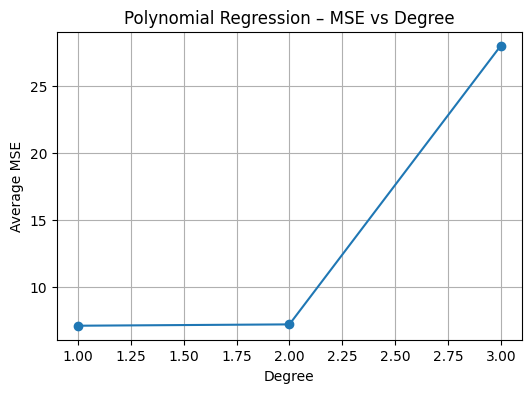

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

degree_results = pd.DataFrame([
    {"degree": 1, "avg_mse": 7.13},   # from your screenshot
    {"degree": 2, "avg_mse": 7.23},   # approximate average, adjust if needed
    {"degree": 3, "avg_mse": 28.0},   # clearly overfitting
])

plt.figure(figsize=(6,4))
plt.plot(degree_results["degree"], degree_results["avg_mse"], marker="o")
plt.title("Polynomial Regression – MSE vs Degree")
plt.xlabel("Degree")
plt.ylabel("Average MSE")
plt.grid(True)
plt.savefig("poly_mse_vs_degree.png", dpi=150)
plt.show()


# PLOT 2: MSE vs Alpha

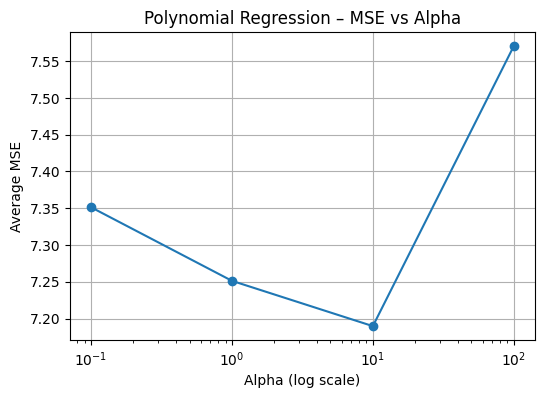

In [21]:
alpha_results = pd.DataFrame([
    {"alpha": 0.1,   "avg_mse": 7.351358},
    {"alpha": 1.0,   "avg_mse": 7.251271},
    {"alpha": 10.0,  "avg_mse": 7.189677},   # BEST
    {"alpha": 100.0, "avg_mse": 7.570540},
])

plt.figure(figsize=(6,4))
plt.plot(alpha_results["alpha"], alpha_results["avg_mse"], marker="o")
plt.xscale("log")
plt.title("Polynomial Regression – MSE vs Alpha")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Average MSE")
plt.grid(True)
plt.savefig("poly_mse_vs_alpha.png", dpi=150)
plt.show()


#PLOT 3: Predictions vs Actual

In [22]:
import pandas as pd
from models import get_model

# load normalized eval set for window 4
X_eval = pd.read_csv("data/normalized/window_4/X_eval.csv")
y_eval = pd.read_csv("data/normalized/window_4/y_eval.csv").squeeze()

# load a training fold to fit the final model (fold 0)
X_train = pd.read_csv("data/normalized/window_4/fold_0/X_train.csv")
y_train = pd.read_csv("data/normalized/window_4/fold_0/y_train.csv").squeeze()


In [23]:
model = get_model("polynomial_regression", {"degree": 2, "alpha": 10.0})
model.fit(X_train, y_train)
y_pred = model.predict(X_eval)


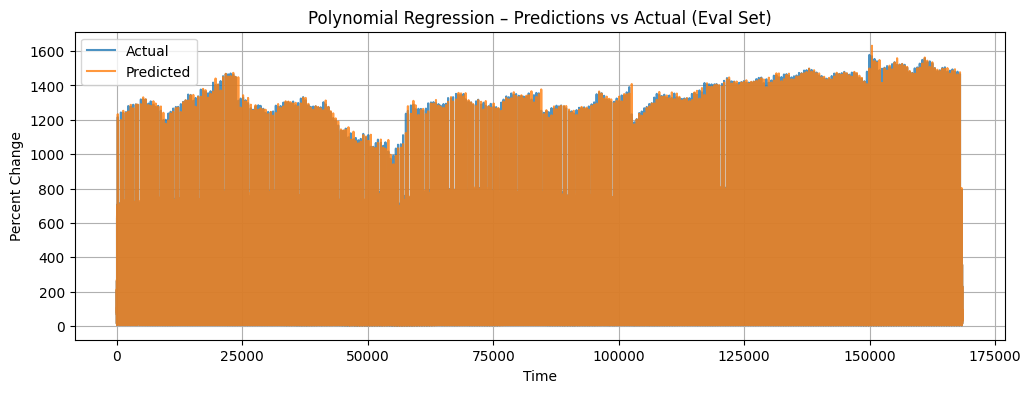

In [24]:
plt.figure(figsize=(12,4))
plt.plot(y_eval.values, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.title("Polynomial Regression – Predictions vs Actual (Eval Set)")
plt.xlabel("Time")
plt.ylabel("Percent Change")
plt.legend()
plt.grid(True)
plt.savefig("poly_predictions_vs_actual.png", dpi=150)
plt.show()


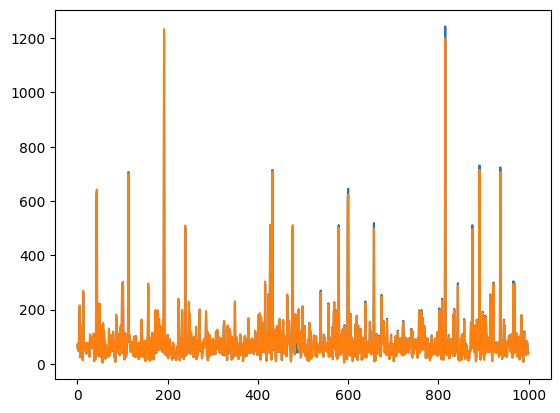

In [25]:
plt.plot(y_eval.values[:1000], label="Actual")
plt.plot(y_pred[:1000], label="Predicted")


Text(0.5, 1.0, 'Absolute Error Over Time')

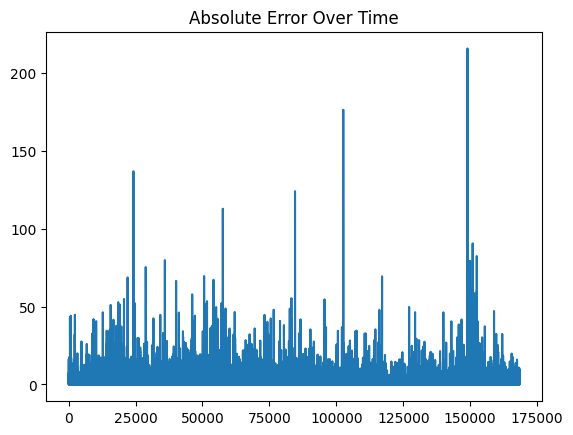

In [26]:
plt.plot(abs(y_eval.values - y_pred))
plt.title("Absolute Error Over Time")
